# Simulación de oscilaciones en un sistema masa-resorte

**Resumen**

Este proyecto simula las oscilaciones de un sistema masa-resorte, explorando cómo diferentes parámetros, como la constante del resorte y la masa, afectan el período de oscilación y el comportamiento del sistema. La simulación ilustra el movimiento armónico simple del sistema y proporciona una visualización dinámica del impacto de las variaciones en los parámetros sobre el comportamiento de oscilación.

**Introducción**

El sistema masa-resorte es un modelo clásico en la física que describe el movimiento de un objeto conectado a un resorte. En este modelo, el objeto oscila alrededor de una posición de equilibrio debido a la fuerza restauradora del resorte. La simulación en este proyecto permite observar cómo diferentes constantes del resorte (k) y masas (m) influyen en el período y amplitud de las oscilaciones. La animación generada ofrece una representación visual del movimiento armónico simple, facilitando la comprensión de cómo estos parámetros afectan el sistema.

**Modelo Matemático**

El modelo matemático se basa en la ecuación diferencial que describe el movimiento oscilatorio en un sistema masa-resorte, dada por:
 **𝑚*𝑑**2*𝑥/𝑑𝑡**2 + 𝑘𝑥 = 0**
 
donde 𝑚 es la masa del objeto, 𝑘 es la constante del resorte, y 𝑥(𝑡) es la posición del objeto en función del tiempo. La solución a esta ecuación diferencial es una función senoidal que describe el movimiento oscilatorio del objeto. El período de oscilación 𝑇 está dado por:
**𝑇 = 2𝜋*raiz cuadrada de 𝑚/𝑘**
​Este modelo permite explorar cómo variaciones en 𝑚 y 𝑘 afectan el período de oscilación y el comportamiento dinámico del sistema.

C:\Users\Work\AppData\Local\Temp\ipykernel_9148\961615601.py:46: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point.set_data(x[frame], 0)


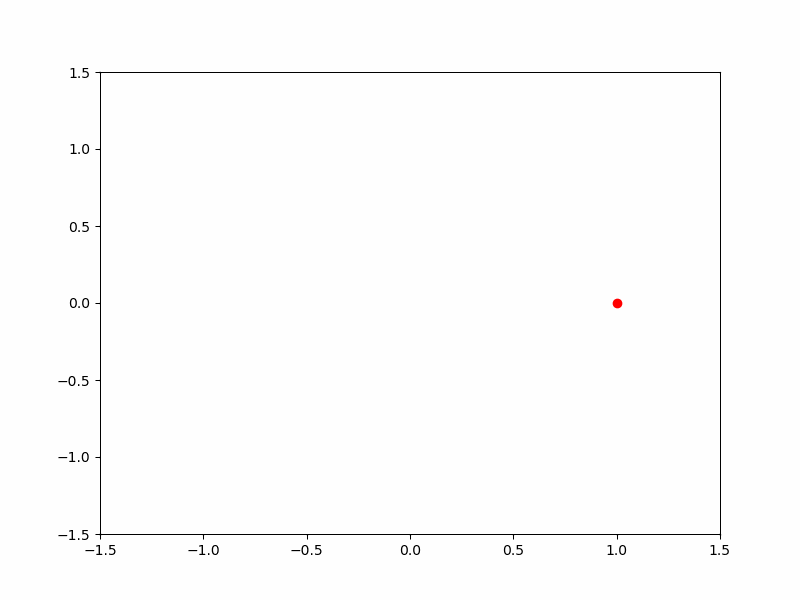

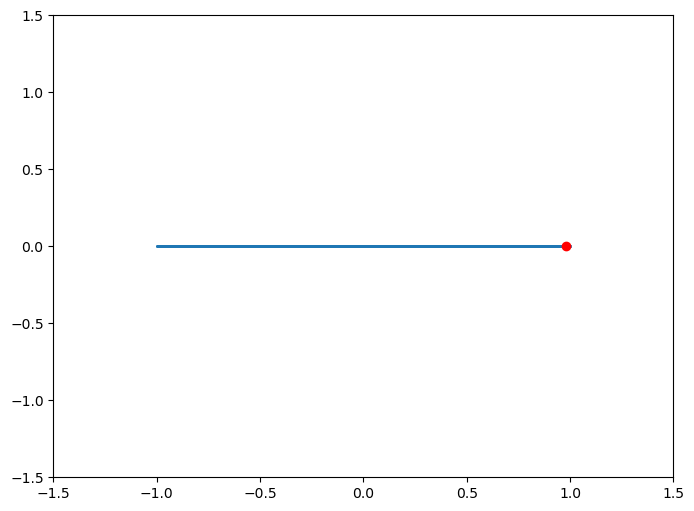

In [2]:
# Importar bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from scipy.integrate import odeint
from IPython.display import Image, display

# Parámetros del sistema
k = 10.0  # Constante del resorte en N/m
m = 1.0   # Masa en kg

# Definir la función que representa el sistema de ecuaciones
def model(y, t, k, m):
    x, v = y
    dydt = [v, - (k / m) * x]
    return dydt

# Definir la función para calcular la trayectoria
def trajectory(y0, t, k, m):
    sol = odeint(model, y0, t, args=(k, m))
    return sol[:, 0], sol[:, 1]

# Condiciones iniciales
x0 = 1.0  # Desplazamiento inicial en metros
v0 = 0.0  # Velocidad inicial en m/s
y0 = [x0, v0]
t = np.linspace(0, 10, 500)  # Tiempo en segundos

# Calcular la trayectoria
x, v = trajectory(y0, t, k, m)

# Configurar la visualización 2D
fig, ax = plt.subplots(figsize=(8, 6))

# Inicializar la animación
line, = ax.plot([], [], lw=2)
point, = ax.plot([], [], 'ro')

def init():
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    return line, point

def update(frame):
    line.set_data(x[:frame], np.zeros_like(x[:frame]))
    point.set_data(x[frame], 0)
    return line, point

# Crear la animación
ani = FuncAnimation(fig, update, frames=len(t), init_func=init, blit=True, interval=50)

# Guardar la animación como un archivo GIF
gif_path = 'oscillation_animation.gif'
ani.save(gif_path, writer=PillowWriter(fps=20))

# Mostrar el archivo GIF en el notebook
display(Image(filename=gif_path))


**Conclusión**

La simulación muestra que el período de oscilación de un sistema masa-resorte depende directamente de la masa del objeto y la constante del resorte. A mayor masa, el período de oscilación aumenta, mientras que a mayor constante del resorte, el período disminuye.
El modelo confirma que el movimiento del sistema masa-resorte sigue un patrón de movimiento armónico simple. La animación proporciona una visualización clara de este comportamiento, mostrando cómo el objeto oscila de manera regular alrededor de la posición de equilibrio.
La simulación demuestra cómo cambios en la constante del resorte y la masa afectan la amplitud y el período de las oscilaciones. Estos efectos son evidentes en la animación, que ilustra cómo el sistema responde a diferentes configuraciones de parámetros.
El modelo puede extenderse para incluir factores adicionales, como la fricción o fuerzas externas. La simulación también puede utilizarse como una herramienta educativa para ilustrar conceptos de dinámica y oscilaciones en física.
La simulación ofrece una representación visual efectiva del sistema masa-resorte, facilitando la comprensión de los conceptos relacionados con el movimiento oscilatorio y la influencia de los parámetros del sistema.